#  Let's reproduce GPT-2 (**124M** para) ../
### - Andrej Karpathy Lecuture./

In [ ]:
from transformers import GPT2LMHeadModel
import matplotlib.pyplot as plt
%matplotlib inline

modelHf = GPT2LMHeadModel.from_pretrained("gpt2") #124m
sd_hf = modelHf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [ ]:
from transformers import pipeline, set_seed
gen = pipeline("text-generation", model='gpt2')
set_seed(42)
gen("hello im a language model,", max_length=30,num_return_sequences=5)


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': 'hello im a language model, but what i do in that case is to change everything in a way that is in the nature of i.e.'},
 {'generated_text': 'hello im a language model, this is not the best language-model for real world examples, we should use a bit of data from previous examples,'},
 {'generated_text': 'hello im a language model, but then there is no way to say that there would be any type of language that is different from that of the Python'},
 {'generated_text': 'hello im a language model, not one of a class.\n\n# define ANNOTATION_STRING_LOCALE 5 // An example for'},
 {'generated_text': "hello im a language model, I think all languages need a reason to work. for instance it makes the code cleaner even if it's not the language"}]

# WHAT IS A @Dataclass ..?

   * In Python, a **dataclass is a decorator introduced in Python 3.7 (via the dataclasses module) that simplifies the creation of classes used primarily for storing data**. It automatically generates special methods such as __init__, __repr__, __eq__, and others, reducing boilerplate code.


Here's an overview of how it works:
        
          from dataclasses import dataclass

        @dataclass
        class Point:
            x: float
            y: float

        # Usage
        p1 = Point(1.0, 2.0)
        p2 = Point(1.0, 2.0)
        p3 = Point(3.0, 4.0)

        print(p1)          # Output: Point(x=1.0, y=2.0)
        print(p1 == p2)    # Output: True (since x and y values are the same)
        print(p1 == p3)    # Output: False
        

# ---------------------------

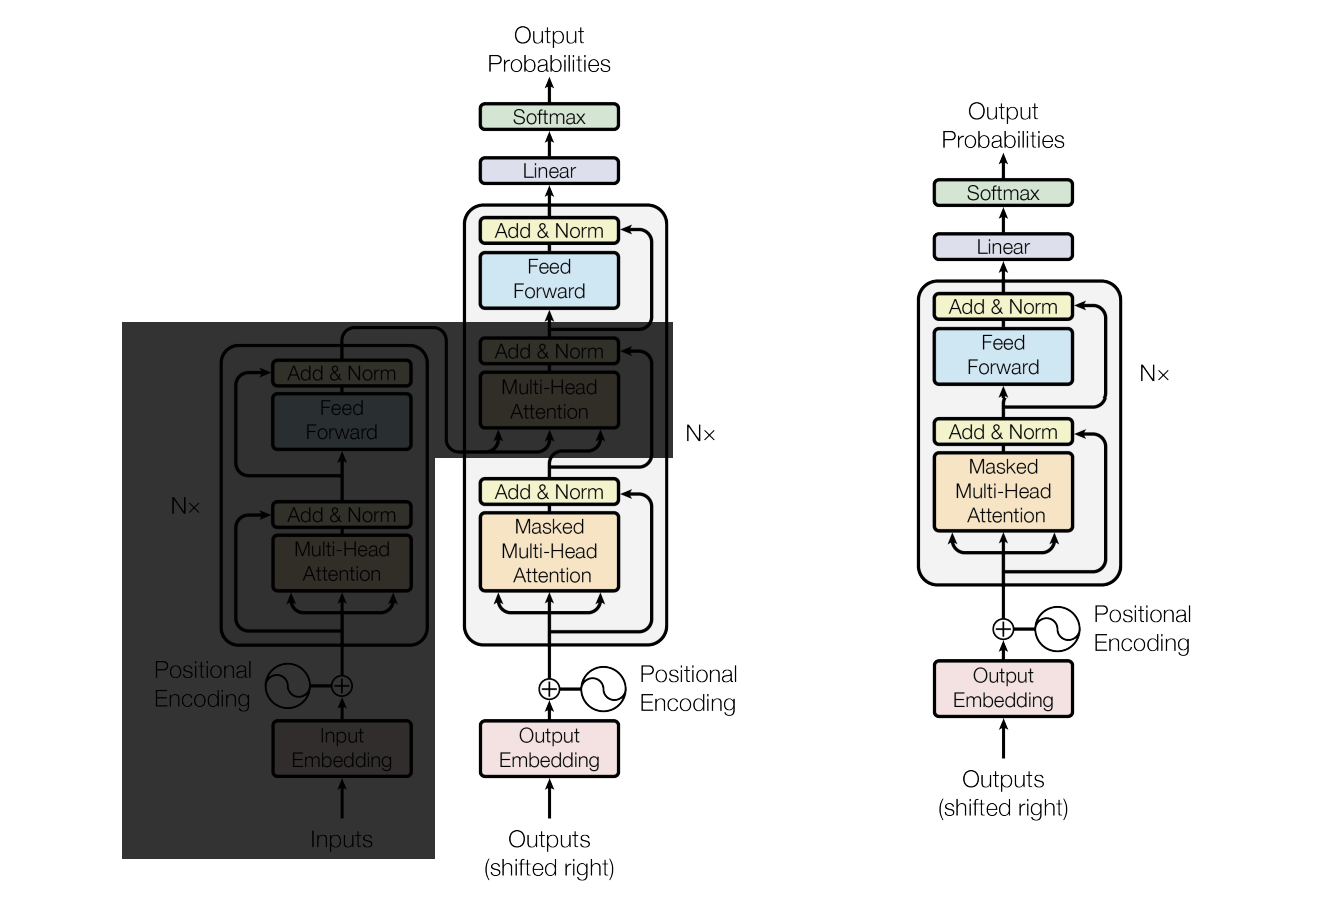


# Block Class
 - The Block class represents a decoder block in the Transformer.

    * self.lyrNorm_1 = nn.LayerNorm(config.nEmb)
    * Represents LayerNorm applied before the self-attention mechanism (pre-normalization).
     
    * self.attn = CuasalSelfAttention(config)
    * Implements masked self-attention to allow the model to only attend to previous positions (causal masking).
     
    * self.lyrNorm_2 = nn.LayerNorm(config.nEmb)
    * Represents LayerNorm applied before the feed-forward network (MLP).
     
    * self.MLP = MLP(config)
    * Represents the Feed-Forward Network (FFN) that processes each position independently.
     
 - forward method:

            Adds residual connections to both self-attention and MLP/FFN outputs.
            Executes the sequence:
            x = x + Attn(LayerNorm(x))
            x = x + MLP(LayerNorm(x))



# GPT Class
 - The GPT class represents the overall Transformer decoder model.

    * self.config: Stores the configuration object (model hyperparameters).
    
    * Transformer Components:
     
    * wToknEmb = nn.Embedding(config.vocabSiz, config.nEmb)
    * Represents the token embedding layer, mapping input tokens to high-dimensional vectors.
     
    * wPosEmb = nn.Embedding(config.blockSiz, config.nEmb)
    * Represents the positional embedding layer, encoding the position of each token in the sequence.
     
    * hidden = nn.ModuleList([Block(config) for _ in range(config.nLayers)])
    * Represents the stack of Transformer decoder blocks, each implementing self-attention and an FFN with residual connections.
     
    * layrNormFinl = nn.LayerNorm(config.nEmb)
    * Applies final LayerNorm after all Transformer blocks (important for stable training).

 + self.lmHead = nn.Linear(config.n_emb, config.vocabSiz, bias=False)
   
   - Represents the language modeling head that outputs logits for each token in the vocabulary, used for predictions.

In [ ]:

class Block(nn.Module):
    def __init__(self, config):
        super(Block, self).__init__()
        self.lyrNorm_1 = nn.LayerNorm(config.nEmb)
        self.attn = CuasalSelfAttention(config)
        self.lyrNorm_2 = nn.LayerNorm(config.nEmb)
        self.MLP = MLP(config)

    def forward(self, x):
        x = x + self.attn(self.lyrNorm_1(x))
        x = x + self.MLP(self.lyrNorm_2(x))
        return x


@dataclass
class GPTConfig:
    blockSiz: int = 256
    vocabSiz: int = 65
    nLayers: int = 6
    nHead: int = 6
    nEmb: int = 384

class GPT(nn.Module):
    def __init__(self, config):
        super(GPT, self).__init__()
        self.config = config

        self.transformer = nn.ModuleDict(dict(
            wToknEmb = nn.Embedding(config.vocabSiz, config.nEmb),
            wPosEmb = nn.Embedding(config.blockSiz, config.nEmb),
            hidden = nn.ModuleList([Block(congig) for _ in range(config.nLayers)]),
            layrNormFinl = nn.LayerNorm(config.nEmb),
        ))

        self.lmHead = nn.Linear(config.n_emb, config.vocabSiz, bias=False)

##### LOok at the code --> [gpt_train.py]
   ---------------

 # What does the % sign do in "%s" % modelTyp?
   * In Python, **the % operator in this context is used for string formatting**. It allows you to insert values into a string in a placeholder format.

    + "%s" is a placeholder for a string value.
    
    + % modelTyp replaces the %s placeholder with the value of modelTyp.

        EX:
            modelTyp = "gpt2"
            print("Loading W from pretrained gpt: %s" % modelTyp)

        OUTPUT:
            Loading W from pretrained gpt: gpt2
  
    ---------

  # Why is [modelTyp] placed at the end of the dict?
            configArgs = {
                'gpt2': dict(nLayers=12, nHead=12, nEmb=768),
                'gpt2-medium': dict(nLayers=24, nHead=16, nEmb=1024),
                'gpt2-large': dict(nLayers=36, nHead=20, nEmb=1080),
                'gpt2-xl': dict(nLayers=48, nHead=25, nEmb=1600),
            }[modelTyp]
        
     * **does two things**:

       + Defines a dictionary where each key corresponds to a model type (e.g., 'gpt2', 'gpt2-medium'), and the value is another dictionary describing the configuration of that model.
       
       + Directly selects a specific entry from the dictionary based on the modelTyp variable.


In [ ]:

import inspect
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from dataclasses import dataclass
import os
from hellaswag import render_example, iterate_examples

from torch.nn.parallel import DistributedDataParallel as DDP
# ===============================


class CausalSelfAttention(nn.Module):
    def __init__(self, config):
        super(CausalSelfAttention, self).__init__()
        assert config.nEmb % config.nHead == 0

        # K, Q, V Projections for all heads, but in batch
        self.c_attn = nn.Linear(config.nEmb, 3 * config.nEmb)

        # output projection
        self.c_proj = nn.Linear(config.nEmb, config.nEmb)
        self.c_proj.NANOGPT_SCALE_INIT = 1 # dealing with Residual Growth
        # Regularization
        self.nHead = config.nHead
        self.nEmb = config.nEmb

        # not realy a biase, more of a Mask, but follwing OpenAi/HF Naming Though
        self.register_buffer("bias", torch.tril(torch.ones(config.blockSiz, config.blockSiz)).view(1, 1, config.blockSiz, config.blockSiz))

    def forward(self, x):
        B, T, C = x.shape #batchSiz, seqLen, embDim[(nEmb)]

        #calc K,Q,V for all heads in batch and movie head forwrd to be the batch dim
        # nh==numHead,  hs==headSiz, C==numOfChannels == nh * hs
        #eg: in GPT2(124M) nHead=12, hs=64, so nh*hs==C[768]

        Q_K_V = self.c_attn(x)
        q, k, v = Q_K_V.split(self.nEmb, dim=2)
        k = k.view(B, T, self.nHead, C // self.nHead).transpose(1, 2) # B, nh, T, hs
        q = q.view(B, T, self.nHead, C // self.nHead).transpose(1, 2) # B, nh, T, hs
        v = v.view(B, T, self.nHead, C // self.nHead).transpose(1, 2) # B, nh, T, hs


        # So theres Some optim that torch.compile Potentialy Cannot Find, so We use FlashAttention
        #attn = (q @ k.transpose(-2, -1)) * (1.0 / math.sqrt(k.size(-1)))
        #attn = attn.masked_fill(self.bias[:, :, :T, :T] == 0, float("-inf"))
        #attn = F.softmax(attn, dim=-1)
        #y =  attn @ v # (B, nh, T, T) x (B, nh, T, hs) ==> (B, nh, T, hs)

        # flashAttention
        y = F.scaled_dot_product_attention(q, k, v, is_causal=True)

        y = y.transpose(1, 2).contiguous().view(B, T, C) # re-assemble all head outputs side by side

        y = self.c_proj(y)

        return y



class MLP(nn.Module):
    def __init__(self, config):
        super(MLP, self).__init__()
        self.c_fc = nn.Linear(config.nEmb, 4 * config.nEmb) # fuly conected
        self.gelu = nn.GELU(approximate='tanh') # Read the paper for Aproxiation
        self.c_proj = nn.Linear(4 * config.nEmb, config.nEmb)
        self.c_proj.NANOGPT_SCALE_INIT = 1 # dealing with Residual Growth

    def forward(self, x):
        x = self.c_fc(x)
        x = self.gelu(x)
        x = self.c_proj(x)

        return x


class Block(nn.Module):
    def __init__(self, config):
        super(Block, self).__init__()
        self.ln_1 = nn.LayerNorm(config.nEmb)
        self.attn = CausalSelfAttention(config)
        self.ln_2 = nn.LayerNorm(config.nEmb)
        self.mlp = MLP(config)

    def forward(self, x):
        x = x + self.attn(self.ln_1(x))
        x = x + self.mlp(self.ln_2(x))
        return x


@dataclass
class GPTConfig:
    blockSiz: int = 1024 #max seq len

    #numOfToken 5057: 50K BPE mergs + 256 byte Token + 1<|endoftext|>
    vocabSiz: int = 50257
    nLayers: int = 12 # num Of layrs
    nHead: int = 12 # num of heads
    nEmb: int = 768 # emb dim



class GPT(nn.Module):
    def __init__(self, config):
        super(GPT, self).__init__()
        self.config = config

        self.transformer = nn.ModuleDict(dict(
            wte = nn.Embedding(config.vocabSiz, config.nEmb),
            wpe = nn.Embedding(config.blockSiz, config.nEmb),
            h = nn.ModuleList([Block(config) for _ in range(config.nLayers)]),
            ln_f = nn.LayerNorm(config.nEmb),
        ))

        self.lm_head = nn.Linear(config.nEmb, config.vocabSiz, bias=False)

        # init para
        self.apply(self._init_weights)

    def _init_weights(self, moduel):
        if isinstance(moduel, nn.Linear):
            std = 0.02
            # We have 2 risidual path going //mlp, attn\\ so 2*
            if hasattr(moduel, "NANOGPT_SCALE_INIT"):
                std *= (2 * self.config.nLayers) **-0.5
            torch.nn.init.normal_(moduel.weight, mean=0.0, std=std)
            if moduel.bias is not None:
                torch.nn.init.zeros_(moduel.bias)

        elif isinstance(moduel, nn.Embedding):
            torch.nn.init.normal_(moduel.weight, mean=0.0, std=0.02)

        ####
        # Loading para from the hugging face to our code, and init GPT class with those para
        ####


    def forward(self, ix, target=None):
        # index is always of shape B, T, }} batch dim and time dim
        B, T = ix.size()
        assert T <= self.config.blockSiz, f"cannot forward seq of len {T}, blockSiz,"

        pos = torch.arange(0, T, dtype=torch.long, device=ix.device)
        posEmb = self.transformer.wpe(pos)
        tokEmb = self.transformer.wte(ix)
        x = posEmb + tokEmb

        for block in self.transformer.h:
            x = block(x)

        x = self.transformer.ln_f(x)

        logits = self.lm_head(x)
        loss = None
        if target is not None:

            # Flatting out Our [B,T,C] input Tensor to -> [B, T], COS Cros enrophy didnt line multi Dim tensors
            loss = F.cross_entropy(logits.view(-1, logits.size(-1)), target.view(-1))
        return logits, loss


    @classmethod
    def from_pretrained(cls, modelTyp):
        """ Loading pre-trained GPT-2 model W from huging face """
        assert modelTyp in {'gpt2', 'gpt2-medium', 'gpt2-large', 'gpt2-xl'}
        from transformers import GPT2LMHeadModel
        print("Loading W from pretrained gpt: %s" % modelTyp)

        configArgs = {
            'gpt2':         dict(nLayers=12, nHead=12, nEmb=768),
            'gpt2-medium':  dict(nLayers=24, nHead=16, nEmb=1024),
            'gpt2-large':   dict(nLayers=36, nHead=20, nEmb=1080),
            'gpt2-xl':      dict(nLayers=48, nHead=25, nEmb=1600),
        }[modelTyp]

        configArgs['vocabSiz'] = 50257
        configArgs['blockSiz'] = 1024

        # Create a from-scratch init minGPT model
        config = GPTConfig(**configArgs)
        model = GPT(config)
        sd = model.state_dict()
        sd_keys = sd.keys()
        sd_keys = [k for k in sd_keys if not k.endswith('.attn.bias')] # discard this mask / buffer, not a param

        # init a huggingface/transformers model
        model_hf = GPT2LMHeadModel.from_pretrained(modelTyp)
        sd_hf = model_hf.state_dict()

        # copy while ensuring all of the parameters are aligned and match in names and shapes
        sd_keys_hf = sd_hf.keys()
        sd_keys_hf = [k for k in sd_keys_hf if not k.endswith('.attn.masked_bias')]# ignore these, just a buffer
        sd_keys_hf = [k for k in sd_keys_hf if not k.endswith('.attn.bias')]# same, just the mask (buffer)
        transposed = ['attn.c_attn.weight', 'attn.c_proj.weight', 'mlp.c_fc.weight', 'mlp.c_proj.weight']

        # basically the openai checkpoints use a "Conv1D" module, but we only want to use a vanilla Linear
        # this means that we have to transpose these weights when we import them
        assert len(sd_keys_hf) == len(sd_keys), f"mismatched keys: {len(sd_keys_hf)} != {len(sd_keys)}"
        for k in sd_keys_hf:
            if any(k.endswith(w) for w in transposed):
                # special treatment for the Conv1D weights we need to transpose
                assert sd_hf[k].shape[::-1] == sd[k].shape
                with torch.no_grad():
                    sd[k].copy_(sd_hf[k].t())

            else:
                # vanilla copy over the other parameters
                assert sd_hf[k].shape == sd[k].shape
                with torch.no_grad():
                    sd[k].copy_(sd_hf[k])

        return model

    def configure_optimizers(self, weightDecay, lr, device):
        #start with the all of the candidate para (that reqar grad)
        paraDict = {pn:p for pn, p in self.named_parameters()}
        paraDict = {pn:p for pn, p in paraDict.items() if p.requires_grad}

        #create optim groups, Any para that is 2d will be weight decay, else no
        #ex: all weight tensor in matmul + emb decay, all bias and layrNorm dont
        decayPara = [p for n, p in paraDict.items() if p.dim() >= 2]
        noDecayPara = [p for n, p in paraDict.items() if p.dim() < 2]
        optimGroups = [
            {"params":decayPara, "weightDecay":weightDecay},
            {"params":noDecayPara, "weightDecay":0.0}
        ]

        numDecayPara = sum(p.numel() for p in decayPara)
        numNoDecayPara = sum(p.numel() for p in noDecayPara)

        print(f"num decay para tensor: {len(decayPara)}, with {numDecayPara:,}, para")
        print(f"num non decay para tensor: {len(noDecayPara)}, with {numNoDecayPara:,}, para")

        # create AdamW optim and use Fused version if it is availble
        # in torch doc AdamW dose not contain fuesed it add later, so thta why we Inspectiing
        fusedAvailble = 'fused' in inspect.signature(torch.optim.AdamW).parameters
        useFused = fusedAvailble and 'cuda' in device
        print(f"using fused AdamW {useFused}")

        optim = torch.optim.AdamW(optimGroups, lr=lr, betas=(0.9, 0.95), eps=1e-8, fused=useFused)

        return optim


#----------------------------
import tiktoken
import numpy as np

def loadTokens(filnm):
    npt = np.load(filnm)
    ptt = torch.tensor(npt, dtype=torch.long)
    return ptt

class DataLoader:
    def __init__(self, B, T, processRank, numProces, split):
        self.B = B
        self.T = T
        self.processRank = processRank
        self.numProces = numProces
        assert split in {"train","val"}

        #get the shards filenm
        dataRoot = "/content/sample_data/wikitext2_shards"
        shards = os.listdir(dataRoot)
        shards = [s for s in shards if split in s]
        shards = sorted(shards)
        shards = [os.path.join(dataRoot, s) for s in shards]
        self.shards = shards
        assert len(shards) > 0, f"no shards found for split {split}"
        if master_process:
            print(f"found {len(shards)} shards for split {split}")

        self.reset()


    def reset(self):
        #state, init at shard 0
        self.curentShard = 0
        self.tokens = loadTokens(self.shards[self.curentShard])
        self.currentPos = self.B * self.T * self.processRank


    def nextBatch(self):
        B, T = self.B, self.T
        # Getting Targt Token for Input Tokenes
        buf = self.tokens[self.currentPos : self.currentPos+B*T+1]
        x = (buf[:-1].view(B, T))# input
        y = (buf[1:].view(B, T))# targt/lable

        self.currentPos += B * T * self.numProces

        if self.currentPos + (B * T * self.numProces + 1) > len(self.tokens):
            self.curentShard = (self.curentShard + 1) % len(self.shards)
            self.tokens = loadTokens(self.shards(self.curentShard))
            self.currentPos = self.B * self.T * self.processRank

        return x, y



import time

device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
    device = "mps"
print(f'Using {device}')

# -----------------------------------------------------------------------------
# helper function for HellaSwag eval
# takes tokens, mask, and logits, returns the index of the completion with the lowest loss

def get_most_likely_row(tokens, mask, logits):
    # evaluate the autoregressive loss at all positions
    shift_logits = (logits[..., :-1, :]).contiguous()
    shift_tokens = (tokens[..., 1:]).contiguous()
    flat_shift_logits = shift_logits.view(-1, shift_logits.size(-1))
    flat_shift_tokens = shift_tokens.view(-1)
    shift_losses = F.cross_entropy(flat_shift_logits, flat_shift_tokens, reduction='none')
    shift_losses = shift_losses.view(tokens.size(0), -1)
    # now get the average loss just for the completion region (where mask == 1), in each row
    shift_mask = (mask[..., 1:]).contiguous() # we must shift mask, so we start at the last prompt token
    masked_shift_losses = shift_losses * shift_mask
    # sum and divide by the number of 1s in the mask
    sum_loss = masked_shift_losses.sum(dim=1)
    avg_loss = sum_loss / shift_mask.sum(dim=1)
    # now we have a loss for each of the 4 completions
    # the one with the lowest loss should be the most likely
    pred_norm = avg_loss.argmin().item()
    return pred_norm


# run the training loop
from torch.distributed import init_process_group, destroy_process_group
import torch.distributed as dist

# /////////////////
# set up DDP (distributed data parallel).
# torchrun command sets the env variables RANK, LOCAL_RANK, and WORLD_SIZE
ddp = int(os.environ.get('RANK', -1)) != -1 # is this a ddp run?
if ddp:
    # use of DDP atm demands CUDA, we set the device appropriately according to rank
    assert torch.cuda.is_available(), "for now i think we need CUDA for DDP"
    init_process_group(backend='nccl')
    ddp_rank = int(os.environ['RANK'])
    ddp_local_rank = int(os.environ['LOCAL_RANK'])
    ddp_world_size = int(os.environ['WORLD_SIZE'])
    device = f'cuda:{ddp_local_rank}'
    torch.cuda.set_device(device)
    master_process = ddp_rank == 0 # this process will do logging, checkpointing etc.
else:
    # vanilla, non-DDP run
    ddp_rank = 0
    ddp_local_rank = 0
    ddp_world_size = 1
    master_process = True
    # attempt to autodetect device
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda"
    elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
        device = "mps"
    print(f"using device: {device}")
# NOTE: Im just copy pase andrej code, i dont think  id have this many fucking GPUs ever [maybe in future ill effort]


torch.manual_seed(1337)
if torch.cuda.is_available():
    torch.cuda.manual_seed(1337)

enc = tiktoken.get_encoding("gpt2")

# Greadient Accumilation:
# For simulate [0.5M BatchSiz] like in papaer
totalBatchSiz = 524288 # 2**19 , ~0.5M, in num of tok
B = 8 # micro batch siz
T = 256 # seq len
assert totalBatchSiz % (B * T * ddp_world_size) == 0, "make sure total batch Size is devisible by B * T * ddp_world_size"
gradAccumStep = totalBatchSiz // (B * T * ddp_world_size)

#if master_process: # else This would Print x times Depending on how many GPUs you;ve
#    print(f'total desired batch siz: {totalBatchSiz}')
#    print(f"=> calc grad accum step: {gradAccumStep}")

trainLoader = DataLoader(B=B, T=T, processRank=ddp_rank, numProces=ddp_world_size, split="train") #i ran out of mem
valLoadr = DataLoader(B=B, T=T, processRank=ddp_rank, numProces=ddp_world_size, split='val')
# B=8, T=512


# Enabeling  TF-32
torch.set_float32_matmul_precision('high')

# Create model
model = GPT(GPTConfig(vocabSiz=50304)) # GPU like when it get num of pow of 2, even.,, 50304 is a pow of 2
model.to(device)
useCompile = False
if useCompile:
    model = torch.compile(model)

if ddp:
    model = DDP(model, device_ids=(ddp_local_rank))
raw_model = model.module if ddp else model #always contain the "raw" unwrapped model

# OK. so this DDP thing is Working when you got fucking so many GPUs
# SO its just synchronize and Avg the grad, that come up with severl diff GPUs after backward
# READ THE DOC...........

#Cosine Decay
maxLr = 6e-4
minLr = maxLr * 0.1
warmupSteps = 10 # 715
maxSteps = 1 # andej using 10e9/2**19 ////

# Learnig Rate Schedule
def getLearningRate(it):
    # 1. Linear warmup for warmup_iters steps
    if it < warmupSteps:
        return maxLr * (it+1) / warmupSteps

    # 2. if it > lr_decay_iters, return min lr
    if it > maxSteps:
        return minLr

    # 3. in between, use cosine decay down to min lr
    decatRatio = (it - warmupSteps) / (maxSteps - warmupSteps)
    assert 0 <= decatRatio <= 1

    coEff = 0.5 * (1.0 + math.cos(math.pi * decatRatio)) # coeff start at 1 and goes to 0
    return minLr + coEff * (maxLr - minLr)

# Optimizer!
#optim = torch.optim.AdamW(model.parameters(), lr=3e-4)
optim = raw_model.configure_optimizers(weightDecay=0.1, lr=6e-4, device=device)

# creat the log dir we will write checkpnt to and log to
logdir = "log"
os.makedirs(logdir, exist_ok=True)
logfile = os.path.join(logdir, f"log.txt")
with open(logfile, 'w') as file:
    pass

for i in range(maxSteps):
    t0 = time.time()
    lastStep = (i == maxSteps - 1)
    #once in a while eval the val loss
    if i % 100 == 0:
        model.eval()
        valLoadr.reset()
        with torch.no_grad():
            valLossAccum = 0.0
            valLossStep = 20
            for _ in range(valLossStep):
                x, y = valLoadr.nextBatch()
                x, y = x.to(device), y.to(device)
                with torch.autocast(device_type=device, dtype=torch.long):
                    logits, loss = model(x, y)
                loss = loss / valLossStep
                valLossAccum += loss.detach()

        if ddp:
            dist.all_reduce(valLossAccum, op=dist.ReduceOp.AVG)
        if master_process:
            print(f"val Loss: {valLossAccum.item():.4f}")
            with open(logfile, 'a') as file:
                file.write(f"{i} val {valLossAccum.item():.4f}\n")
    # once in a while evaluate hellaswag
    if (i % 250 == 0 or lastStep) and (not useCompile):
        num_correct_norm = 0
        num_total = 0
        for i, example in enumerate(iterate_examples("val")):
            # only process examples where i % ddp_world_size == ddp_rank
            if i % ddp_world_size != ddp_rank:
                continue
            # render the example into tokens and labels
            _, tokens, mask, label = render_example(example)
            tokens = tokens.to(device)
            mask = mask.to(device)
            # get the logits
            with torch.no_grad():
                with torch.autocast(device_type=device, dtype=torch.bfloat16):
                    logits, loss = model(tokens)
                pred_norm = get_most_likely_row (tokens, mask, logits)
            num_total += 1
            num_correct_norm += int(pred_norm == label)
        # reduce the stats across all processes
        if ddp:
            num_total = torch.tensor(num_total, dtype=torch.long, device=device)
            num_correct_norm = torch.tensor(num_correct_norm, dtype=torch.long, device=device)
            dist.all_reduce(num_total, op=dist.ReduceOp.SUM)
            dist.all_reduce(num_correct_norm, op=dist.ReduceOp.SUM)
            num_total = num_total.item()
            num_correct_norm = num_correct_norm.item()
        acc_norm = num_correct_norm / num_total
        if master_process:
            print(f"HellaSwag accuracy: {num_correct_norm}/{num_total}={acc_norm:.4f}")
            with open(logfile, "a") as f:
                f.write(f"{i} hella {acc_norm:.4f}\n")

    if ((i > 0 and i % 250 == 0) or lastStep) and (not useCompile):
        model.eval()
        numReturnSeq = 4
        maxLen = 32
        tokens = enc.encode("hello, i'm a language model,")
        tokens = torch.tensor(tokens, dtype=torch.long)
        tokens = tokens.unsqueeze(0).repeat(numReturnSeq, 1)
        xgen = tokens.to(device)
        sampleRng = torch.Generator(device=device)
        sampleRng.manual_seed(42 + ddp_rank)
        while xgen.size(1) < maxLen:
            #forward the model to get logist
            with torch.no_grad():
                logits, loss = model(xgen)
                logits = logits[:, -1, :]
                probs = F.softmax(logits, dim=-1)
                # do top-k sampling of 50 (huggingface pipeline default)
                # topk_probs here becomes (5, 50), topk_indices is (5, 50)
                topkProbs, topkIx = torch.topk(probs, 50, dim=-1)
                # select a token from the top-k probabilities
                # note: multinomial does not demand the input to sum to 1
                ix = torch.multinomial(topkProbs, 1, generator=sampleRng)# (B, 1)
                #gather corect ix
                xcol = torch.gather(topkIx, -1, ix)
                xgen = torch.cat((xgen, xcol), dim=1)

        for k in range(numReturnSeq):
            tokens = xgen[i, :maxLen].tolist()
            decod = enc.decode(tokens)
            print(f"rank {ddp_rank} sample {i}: {decod}")

    #training loop
    model.train()
    optim.zero_grad()
    lossAccum = 0.0
    for microStep in range(gradAccumStep):
        x, y = trainLoader.nextBatch()
        x, y = x.to(device), y.to(device)
        with torch.autocast(device_type=device, dtype=torch.bfloat16):
            logits, loss = model(x, y)
        # we've to scale the loss to account for grad accum
        # Cos the grad just add on each succesiv backward()
        # addition of grad correspond to a sum in the objectiv, but
        # instead of a SUM we want MEAN, scale the loss here so it comes out right

        loss = loss / gradAccumStep
        lossAccum += loss.detach()

        if ddp:
            model.require_backward_grad_sync = (microStep == gradAccumStep - 1)
        loss.backward()

    # Ok so Since we got Parrelel GPUs working And weve AVG grad, and we want AVG loss as well
    if ddp:
        dist.all_reduce(lossAccum, op=dist.ReduceOp.AVG)

    #clip the global norm of the grad at 1.0
    norm = torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    lr = getLearningRate(i)
    for paraGroup in optim.param_groups:
        paraGroup['lr'] = lr
    optim.step()
    torch.cuda.synchronize()

    t1 = time.time()
    dt = (t1 - t0)*1000 #time dif in mili second

    tokensProcessd = trainLoader.B * trainLoader.T * gradAccumStep * ddp_world_size
    tokPerSec = tokensProcessd / dt

    if master_process:
        print(f'step {i} |, loss:{lossAccum.item():.6f} |, lr:{lr:.4e} norm:{norm:.4f} | dt:{dt:.2f}ms |, tok/sec:{tokPerSec}')

        with open(logfile, 'a') as file:
            file.write(f"{i} train {lossAccum.item():.6f}]n")
if ddp:
    destroy_process_group()





Using cuda
using device: cuda
found 3 shards for split train
num decay para tensor: 51, with 162,988,032, para
num non decay para tensor: 98, with 121,344, para
using fused AdamW True


/usr/local/lib/python3.10/dist-packages/torch/_inductor/compile_fx.py:1604: UserWarning: Tesla T4 does not support bfloat16 compilation natively, skipping
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/_inductor/compile_fx.py:1604: UserWarning: Tesla T4 does not support bfloat16 compilation natively, skipping
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/_inductor/compile_fx.py:1604: UserWarning: Tesla T4 does not support bfloat16 compilation natively, skipping
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/_inductor/compile_fx.py:1604: UserWarning: Tesla T4 does not support bfloat16 compilation natively, skipping
  warnings.warn(


OutOfMemoryError: CUDA out of memory. Tried to allocate 198.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 113.06 MiB is free. Process 2335 has 14.63 GiB memory in use. Of the allocated memory 14.35 GiB is allocated by PyTorch, and 170.05 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

# AHHH FUck this im fucking run out of memory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Genarate From The Model

In [ ]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.8 MB/s eta 0:00:00


# GEN From random model

# Loading Data file

In [ ]:

with open('input.txt', 'r', encoding='utf-8') as file:
    txt = file.read()

data = txt[:1000]
print(data[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [ ]:
import tiktoken

enc = tiktoken.get_encoding("gpt2")
tokens = enc.encode(data)
print(tokens[:24])

[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13]


# Creating a (B, T) dim Tensor That we can Feed into the **Forward**,
# Out of these **one dim Sequences**

In [ ]:
import torch

buf = torch.tensor(tokens[:24])
x = buf.view(4, 6)
x

tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])

### So you can see that this view stack up Our one dim seq. As we want creating a Batch

# And now we want Label for that data,
 * what is the Next Token[char] comes next,

In [ ]:
buf = torch.tensor(tokens[:24 + 1]) #Get very last token 13
x = buf[:-1].view(4, 6) #get up to last token
y = buf[1:].view(4, 6) # Avoid first Token
print(x)
print(y)
# Now that y Will contain Next Char[Token/Label] for X

tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])
tensor([[22307,    25,   198,  8421,   356,  5120],
        [  597,  2252,    11,  3285,   502,  2740],
        [   13,   198,   198,  3237,    25,   198],
        [ 5248,   461,    11,  2740,    13,   198]])


In [ ]:

device = "cuda" if torch.cuda.is_available() else "cpu"



import tiktoken

enc = tiktoken.get_encoding('gpt2')
with open('/content/input.txt', 'r', encoding='utf-8') as file:
    txt = file.read()

txt = txt[:1000]

tokens = enc.encode(txt)
B, T = 4, 32
buf = torch.tensor(tokens[:B*T + 1])
x = buf[:-1].view(B, T)
y = buf[1:].view(B, T)

model = GPT.from_pretrained('gpt2')
model.to(device)
logits, loss = model(x, y)

print(loss)


Loading W from pretrained gpt: gpt2
tensor(5.1067, grad_fn=<NllLossBackward0>)


# Fixing a Bug


# Ok so Down here we can see that 2 Emb are Identically similar each other
 * there shape, element, data ptr are all exactly the same

# READ the paper //Using the Output Embedding to Improve Language Models
  
  * So in that paper They Share [ wte ]  Tensor

  * But in out code We didnt

  * So we might Linked up, Share This 2 emb...
    

        # Weight Sharing Scheme
        self.lm_head.wte.weight = self.lm_head.weight

+ In GPT-2, each token is represented as an embedding (data point) from the input vocabulary using self.lm_head.wte.weight. This embedding is processed through transformer layers, and at the output, the same embedding matrix (self.lm_head.weight) is reused to project the model's output into the vocabulary space, calculating logits for the next token probabilities. Using the embedding matrix twice—once during the input embedding phase and again during output projection—is efficient because it ties the input and output spaces, improving generalization and reducing the total number of parameters through weight sharing.

    

In [ ]:
print(sd_hf['lm_head.weight'].shape)
print(sd_hf['transformer.wte.weight'].shape)

torch.Size([50257, 768])
torch.Size([50257, 768])


In [ ]:
(sd_hf['lm_head.weight'] == sd_hf['transformer.wte.weight']).all()

tensor(True)

In [ ]:
# Data Pointr in Storage
print(sd_hf['lm_head.weight'].data_ptr())
print(sd_hf['transformer.wte.weight'].data_ptr())

135304083669056
135304083669056


# ------------

# Std Grows inside ***Residual Stream***

+ This Scaling factor they use in paper here is Exactly **Compenstates** **that Growth**

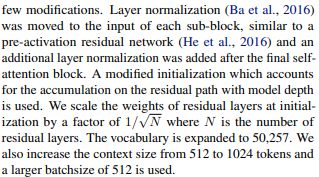

In [ ]:
x = torch.zeros(768)
n = 100
for i in range(n):
    # appy 1/sqrt(N)
    x += n**-0.5 * torch.randn(768) #n**-0.5==1/stqt(N)

print(x.std())

# BEfore Appy 1/sqrt(N) Std==9.78...
# AFter Appy 1/sqrt(N) Std=1.0

tensor(1.0584)



# READ ABOUT THE ***Tensor Cores***...

# Study on ***TensorFloat-32***

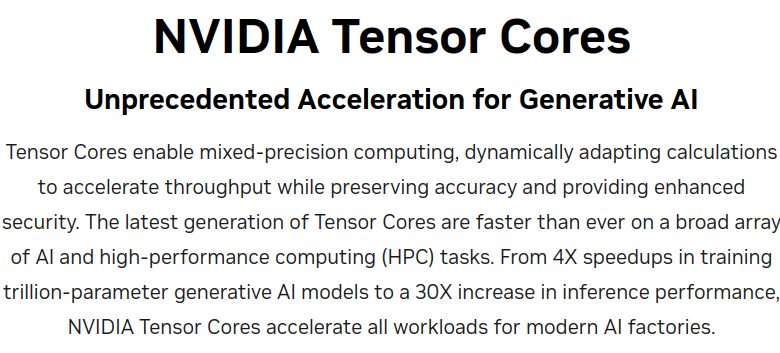

# Automatic Mixed Precision package..
# READ: torch.autocast
        
            https://pytorch.org/docs/stable/amp.html#automatic-mixed-precision-package-torch-amp

# -------------------------------------------------------
#  **Torch.Compile**

            https://pytorch.org/tutorials/intermediate/torch_compile_tutorial.html

 * torch.compile is the latest method to **speed up your PyTorch code!** torch.compile makes PyTorch code **run faster by JIT-compiling PyTorch code into optimized kernels**,

 * all while requiring minimal code changes.  
    
          model = torch.compile(model)

EX:
    
        class TanhGELU(nn.Module):
            def forward(self, input):
                return 0.5 * input * (1 + torch.tanh(math.sqrt(2/math.pi) * (input + 0.044715 * math.pow(input, 3.0))))
    
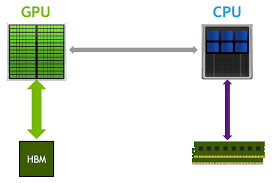

* So if we have python Interpreter itll Go back and forth, round trip to Gpu and HBM

* python interpreter doing its calc. right to left one at a time, it do adition go back to HBM and go back to GPU and do mul

* But torch.compile Do it onece while keeping that memory on gpu, so it reduce this read/write round trip and make calc lot faster

# ------------------------------------
# This is Unefficient.... !
            for microStep in range(gradAccumStep):
                x, y = trainLoader.nextBatch()
                x, y = x.to(device), y.to(device)
                with torch.autocast(device_type=device, dtype=torch.bfloat16):
                    logits, loss = model(x, y)

                loss.backward()

# Undestand why with Ex:

In [ ]:
import torch

net = torch.nn.Sequential(
    torch.nn.Linear(16, 32),
    torch.nn.GELU(),
    torch.nn.Linear(32, 1)
)

torch.manual_seed(42)
x = torch.randn(4, 16)
y = torch.randn(4, 1)

net.zero_grad()
yHat = net(x)
loss = torch.nn.functional.mse_loss(yHat, y)
loss.backward()
print(net[0].weight.grad.view(-1)[:10])



tensor([-0.1978, -0.0766,  0.0130,  0.1127,  0.0331, -0.0231, -0.0517, -0.1627,
        -0.2258,  0.0185])



## The loss Objective here is (deu to the reduction="mean")

            L = 1/4 * [
                (y[0] - yHat[0]**2) +
                (y[1] - yHat[1]**2) +
                (y[2] - yHat[2]**2) +
                (y[3] - yHat[3]**2)
                
            ]

## Now lets do it with grad accum steps of 4, and B=1
## the loss objective here is deff Cos,
## accum in grad <--------> SUM in loss
 * Ex> we instead get
    
            L0 =  (y[0] - yHat[0])**2
            L1 =  (y[1] - yHat[1])**2
            L2 =  (y[2] - yHat[2])**2
            L3 =  (y[3] - yHat[3])**2

            L = L0 + L1 + L2 + L3
    
  NOTE: the "Normalizer" of 1/4 is lost
  

In [ ]:
net.zero_grad()
for i in range(4):
    yHat = net(x[i])
    loss = torch.nn.functional.mse_loss(yHat, y[i])
    loss = loss / 4
    loss.backward()

print(net[0].weight.grad.view(-1)[:10])


tensor([-0.1978, -0.0766,  0.0130,  0.1127,  0.0331, -0.0231, -0.0517, -0.1627,
        -0.2258,  0.0185])


# So you can see that grad of these 2 not the Same

            1. tensor([-0.1978, -0.0766,  0.0130,  0.1127,  0.0331, -0.0231, -0.0517, -0.1627,
        -0.2258,  0.0185])

            2. tensor([-0.7912, -0.3065,  0.0521,  0.4510,  0.1326, -0.0922, -0.2066, -0.6509,
        -0.9032,  0.0738])


  * its Cos we loss the normalizer 1/4
  * To fix this we can call 1/4 in loss
          loss = loss / 4

# After Put normalizer on loss the grad are same

# =============================================

# **DistributedDataParallel** torch||
 Using Heavy Wepon... well if have fucking GPUs

  * Implement distributed data parallelism based on torch.distributed at module level.

  * This container provides data parallelism by synchronizing gradients across each model replica. The devices to synchronize across are specified by the input process_group, which is the entire world by default. Note that DistributedDataParallel does not chunk or otherwise shard the input across participating GPUs; the user is responsible for defining how to do so, for example through the use of a DistributedSampler.

In [ ]:
# moving files,,,,,,
import os

file1 = "/content/wikitext2_train_000000.npy"
file2 = "/content/wikitext2_train_000001.npy"
file3 = "/content/wikitext2_train_000002.npy"

destinationDir = "/content/sample_data/wikitext2_shards"

os.makedirs(destinationDir, exist_ok=True)

os.rename(file1, os.path.join(destinationDir, "wikitext2_train_000000.npy"))
os.rename(file2, os.path.join(destinationDir, "wikitext2_train_000001.npy"))
os.rename(file3, os.path.join(destinationDir, "wikitext2_train_000002.npy"))

print(f"fiels move to {destinationDir}")

fiels move to /content/sample_data/wikitext2_shards


In [ ]:

####################
####################
####################
####################
####################
#NOTE
#NOTE
#  So its too big that Fineweb Dataset so i got
#  This wikiText-2 Dataset,
#  and ask gpt to how can i adapt this dataset to follow alone with the lecture
#  So in this code im USING WIKITEXT-2 Dataset
####################
####################
####################
####################
####################
import os
import multiprocessing as mp
import numpy as np
import tiktoken
from datasets import load_dataset
from tqdm import tqdm

# Set up the local directory for caching data
localDir = "wikitext2_shards"
shardSiz = int(1e6)  # Smaller shard size for Colab, adjust as needed

# Create the cache directory if it doesn't exist
DATA_CATCH_DIR = os.path.join(os.getcwd(), localDir)
os.makedirs(DATA_CATCH_DIR, exist_ok=True)

# Download the WikiText-2 dataset
dataset = load_dataset("wikitext", "wikitext-2-raw-v1", split="train")

# Initialize the tokenizer
enc = tiktoken.get_encoding("gpt2")
eot = enc._special_tokens["<|endoftext|>"]

def tokenize(doc):
    # Tokenizes a single document and returns a numpy array of uint16 tokens
    tokens = [eot]  # Add the special <|endoftext|> token at the start
    tokens.extend(enc.encode_ordinary(doc))
    tokens_np = np.array(tokens)
    assert (0 <= tokens_np).all() and (tokens_np < 2**16).all(), "Token dictionary too large for uint16"
    return tokens_np.astype(np.uint16)

def write_datafile(filename, tokens_np):
    # Save tokenized data to a .npy file
    np.save(filename, tokens_np)

# Tokenize all documents and write output shards
nprocs = max(1, os.cpu_count() // 2)
with mp.Pool(nprocs) as pool:
    shard_index = 0
    all_tokens_np = np.empty((shardSiz,), dtype=np.uint16)
    token_count = 0
    progress_bar = None

    for tokens in pool.imap(tokenize, dataset["text"], chunksize=16):
        if token_count + len(tokens) < shardSiz:
            # Append tokens to the current shard
            all_tokens_np[token_count:token_count+len(tokens)] = tokens
            token_count += len(tokens)
            if progress_bar is None:
                progress_bar = tqdm(total=shardSiz, unit="tokens", desc=f"Shard {shard_index}")
            progress_bar.update(len(tokens))
        else:
            # Write the current shard and start a new one
            remainder = shardSiz - token_count
            progress_bar.update(remainder)
            all_tokens_np[token_count:token_count+remainder] = tokens[:remainder]
            write_datafile(
                os.path.join(DATA_CATCH_DIR, f"wikitext2_train_{shard_index:06d}.npy"),
                all_tokens_np
            )
            shard_index += 1
            progress_bar = None

            # Populate the next shard with leftovers from the current doc
            all_tokens_np[:len(tokens)-remainder] = tokens[remainder:]
            token_count = len(tokens) - remainder

    # Write any remaining tokens as the last shard
    if token_count != 0:
        write_datafile(
            os.path.join(DATA_CATCH_DIR, f"wikitext2_train_{shard_index:06d}.npy"),
            all_tokens_np[:token_count]
        )